**2018047** *Ahmed Nadeem*

**2018284** *Muhammad Hassan Baig*

**2018076** *Arsalan Ashraf*

# Importing

Importing the necessary modeules and dataset

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras import backend as K

# Data splitting

Splitting the dataset into testing and training

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


# Data preprocessing

Reshapping of data

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

**Vector encoding of the classes**

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Normalizing the data to float for model**

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Train size:", x_train.shape[0])
print("Test size:", x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Train size: 60000
Test size: 10000


# Defining the model

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

**Compiling the model**

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

**Model's details**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

**Training the model**

In [9]:
history = model.fit(x_train, y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 52s 72ms/step - loss: 2.2978 - accuracy: 0.1324 - val_loss: 2.2396 - val_accuracy: 0.3034
Epoch 2/20
469/469 [==============================] - 63s 135ms/step - loss: 2.2345 - accuracy: 0.2489 - val_loss: 2.1649 - val_accuracy: 0.4954
Epoch 3/20
469/469 [==============================] - 42s 90ms/step - loss: 2.1643 - accuracy: 0.3824 - val_loss: 2.0752 - val_accuracy: 0.5991
Epoch 4/20
469/469 [==============================] - 42s 90ms/step - loss: 2.0775 - accuracy: 0.4766 - val_loss: 1.9621 - val_accuracy: 0.6612
Epoch 5/20
469/469 [==============================] - 42s 91ms/step - loss: 1.9671 - accuracy: 0.5524 - val_loss: 1.8200 - val_accuracy: 0.7004
Epoch 6/20
469/469 [==============================] - 43s 91ms/step - loss: 1.8299 - accuracy: 0.6026 - val_loss: 1.6475 - val_accuracy: 0.7330
Epoch 7/20
469/469 [==============================] - 42s 90ms/step - loss: 1.6687 - accuracy: 0.6407 - val_loss: 1.4557 - val_accuracy

# Plotting

**Model accuracy plot**

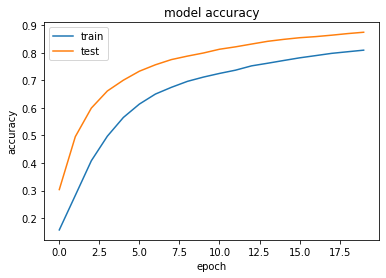

In [10]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Plot for model loss**

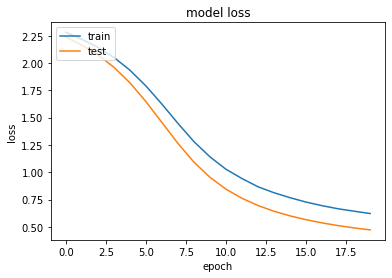

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
model.save("data.h5")